In [33]:
import pickle
import pycaret
import pandas as pd
import seaborn as sns
from pycaret.classification import *
from sklearn import preprocessing

Stage of behavior prediction

In [34]:
fitbit = pd.read_pickle('./data/fitbit_to_baseline_model.pkl')
fitbit["date"] = pd.to_datetime(pd.to_datetime(fitbit["date"]).dt.date)
fitbit

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,621e301e67b776a240608a72,2021-05-24,34.710232,NaN,NaN,NaN,NaN,74.0,0.700000,0.700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,621e301367b776a24057738e,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,621e360b67b776a24039709f,2021-05-24,NaN,68.321,31.413,NaN,15.4,69.0,0.633333,0.650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,621e2fce67b776a240279baa,2021-05-24,34.783747,83.170,15.941,96.6,15.2,70.0,0.733333,0.725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,621e345267b776a240691064,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4960,621e310d67b776a24003096d,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4961,621e324e67b776a2400191cb,2022-01-17,33.104768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4962,621e30f467b776a240f22944,2022-01-17,34.352490,NaN,NaN,NaN,13.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
ttm = pd.read_pickle('./data/surveys/ttm.pkl')
ttm = ttm.rename(columns={"user_id": "id", "submitdate": "date"})
ttm["date"] = pd.to_datetime(pd.to_datetime(ttm["date"]).dt.date)
ttm

,id,type,date,stage,ttm_consciousness_raising,ttm_dramatic_relief,ttm_environmental_reevaluation,ttm_self_reevaluation,ttm_social_liberation,ttm_counterconditioning,ttm_helping_relationships,ttm_reinforcement_management,ttm_self_liberation,ttm_stimulus_control
0,621e2e8e67b776a24055b564,ttmspbf,2021-07-26,Maintenance,1.333333,2.666667,2.333333,4.333333,4.000000,4.000000,4.000000,4.000000,4.000000,1.666667
0,621e2eaf67b776a2406b14ac,ttmspbf,2021-11-29,Contemplation,3.333333,2.666667,4.000000,4.666667,4.000000,2.333333,3.000000,4.333333,3.333333,1.000000
1,621e2eaf67b776a2406b14ac,ttmspbf,2022-01-17,Action,3.666667,2.333333,4.333333,4.333333,3.333333,1.666667,3.000000,4.333333,3.333333,3.000000
0,621e2ed667b776a24085d8d1,ttmspbf,2021-06-07,Preparation,1.000000,2.000000,3.000000,3.333333,3.333333,1.000000,1.000000,3.333333,1.666667,1.000000
1,621e2ed667b776a24085d8d1,ttmspbf,2021-07-30,Contemplation,1.666667,2.333333,4.000000,3.333333,3.666667,1.333333,1.000000,2.333333,2.333333,1.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,621e36c267b776a240ba2756,ttmspbf,2021-05-31,Action,2.666667,1.000000,3.000000,4.333333,3.666667,4.000000,3.333333,4.000000,3.666667,3.000000
0,621e36f967b776a240e5e7c9,ttmspbf,2021-05-31,Action,2.000000,4.333333,3.333333,5.000000,3.000000,3.333333,1.666667,3.666667,4.000000,3.333333
1,621e36f967b776a240e5e7c9,ttmspbf,2021-07-26,Action,4.000000,3.666667,3.666667,5.000000,3.000000,3.000000,1.666667,4.666667,4.000000,3.000000
0,621e375b67b776a240290cdc,ttmspbf,2021-06-01,Action,2.333333,1.666667,1.000000,2.666667,5.000000,1.000000,3.000000,4.666667,2.666667,1.333333


In [36]:
print("TTM responses before dropping user duplicates: {}".format(ttm.shape[0]))
ttm.drop_duplicates(subset='id', keep='first', inplace=True)
print("TTM responses after dropping user duplicates: {}".format(ttm.shape[0]))

TTM responses before dropping user duplicates: 94
TTM responses after dropping user duplicates: 53


In [37]:
fitbit_ttm = fitbit.merge(ttm[['id', 'date', 'stage']], on=['id','date'])
fitbit_ttm

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,stage
0,621e2f3967b776a240c654db,2021-05-31,33.124766,75.366,22.920,NaN,16.6,75.0,0.933333,0.800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preparation
1,621e2fce67b776a240279baa,2021-05-31,34.379283,73.504,21.036,98.0,15.2,82.0,0.966667,0.825,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Contemplation
2,621e2fb367b776a24015accd,2021-05-31,34.312944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Contemplation
3,621e328667b776a240281372,2021-05-31,33.658822,63.698,33.857,NaN,14.8,88.0,0.766667,1.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Maintenance
4,621e2f7a67b776a240f14425,2021-05-31,33.562092,NaN,NaN,97.3,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Maintenance
5,621e335a67b776a240bb12ff,2021-05-31,35.560128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Action
6,621e314867b776a24029ebf9,2021-05-31,33.876789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preparation
7,621e36c267b776a240ba2756,2021-05-31,33.094862,NaN,NaN,NaN,NaN,80.0,0.766667,0.750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Action
8,621e32d967b776a240627414,2021-05-31,31.921658,NaN,NaN,96.9,16.6,0.0,0.000000,0.000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Maintenance
9,621e36f967b776a240e5e7c9,2021-05-31,34.052594,64.918,54.922,95.7,15.0,0.0,0.000000,0.000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Action


In [38]:
fitbit_ttm = fitbit.merge(ttm[['id', 'stage']], on=['id'])
fitbit_ttm

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,stage
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Maintenance
1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,NaN,15.8,80.0,0.833333,0.725,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Maintenance
2,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,119.212,NaN,14.6,84.0,0.966667,0.725,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Maintenance
3,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,111.709,NaN,14.8,82.0,0.933333,0.725,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Maintenance
4,621e2e8e67b776a24055b564,2021-05-28,34.178922,56.750,103.034,NaN,15.2,81.0,0.866667,0.725,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Maintenance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3642,621e339967b776a240e502de,2022-01-13,33.816660,51.760,47.281,96.7,11.6,79.0,0.700000,0.725,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Maintenance
3643,621e339967b776a240e502de,2022-01-14,34.460723,51.351,45.883,95.7,12.0,79.0,0.766667,0.775,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maintenance
3644,621e339967b776a240e502de,2022-01-15,34.137341,50.504,49.779,95.7,12.0,78.0,0.833333,0.700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Maintenance
3645,621e339967b776a240e502de,2022-01-16,34.406884,51.533,45.322,94.5,11.6,73.0,0.700000,0.725,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Maintenance


In [39]:
data = fitbit_ttm
data = data.drop(columns=['date', 'id', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE'])

<AxesSubplot:xlabel='count', ylabel='stage'>

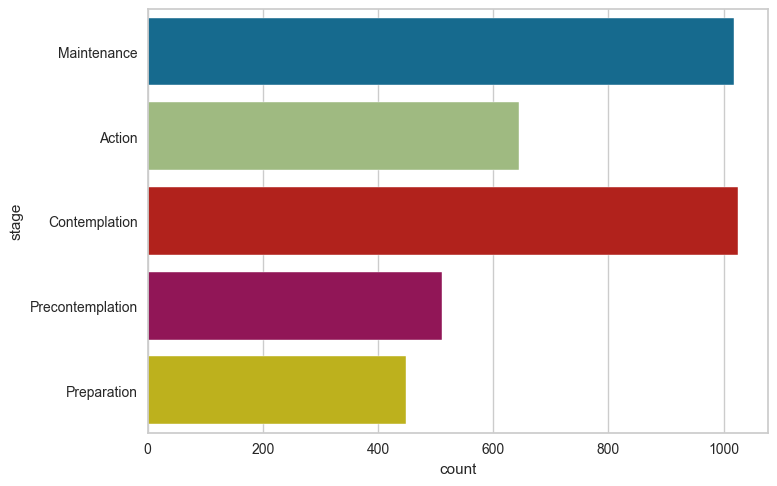

In [40]:
sns.countplot(y="stage", data=data)

In [41]:
s = setup(data=data, target='stage', silent=True, session_id=123)

,Description,Value
0,session_id,123
1,Target,stage
2,Target Type,Multiclass
3,Label Encoded,"Action: 0, Contemplation: 1, Maintenance: 2, Precontemplation: 3, Preparation: 4"
4,Original Data,"(3647, 55)"
5,Missing Values,True
6,Numeric Features,35
7,Categorical Features,19
8,Ordinal Features,False
9,High Cardinality Features,False


In [42]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8762,0.9761,0.8596,0.8782,0.8763,0.8398,0.8402,0.2920
catboost,CatBoost Classifier,0.8687,0.9771,0.8529,0.8695,0.8680,0.8302,0.8306,17.7630
xgboost,Extreme Gradient Boosting,0.8664,0.9755,0.8477,0.8679,0.8658,0.8270,0.8276,1.3200
gbc,Gradient Boosting Classifier,0.8315,0.9709,0.8082,0.8327,0.8301,0.7813,0.7822,1.3180
rf,Random Forest Classifier,0.8237,0.9533,0.7958,0.8277,0.8223,0.7703,0.7719,0.1240
et,Extra Trees Classifier,0.8049,0.9207,0.7780,0.8096,0.8033,0.7458,0.7476,0.1110
dt,Decision Tree Classifier,0.7821,0.8612,0.7667,0.7843,0.7817,0.7186,0.7193,0.0180
ada,Ada Boost Classifier,0.5231,0.7304,0.4959,0.5298,0.5165,0.3767,0.3808,0.0880
lda,Linear Discriminant Analysis,0.4961,0.7801,0.4332,0.5010,0.4792,0.3288,0.3346,0.0140
ridge,Ridge Classifier,0.4871,0.0000,0.4005,0.5048,0.4482,0.3033,0.3178,0.0070


In [44]:
best

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

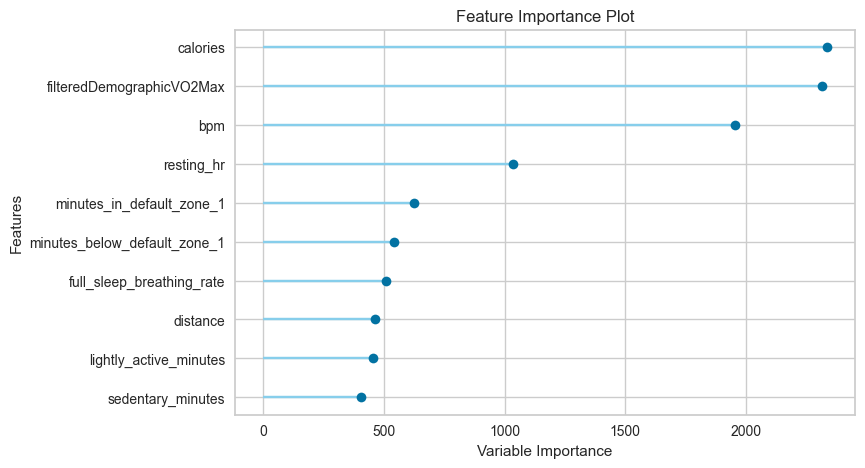

In [43]:
plot_model(best, plot='feature')

Breq self-determination prediction

In [13]:
data = pd.read_pickle('data/fitbit_breq_to_model.pkl')
data

,id,date,breq_amotivation,breq_external_regulation,breq_introjected_regulation,breq_identified_regulation,breq_intrinsic_regulation,breq_self_determination,nightly_temperature,nremhr,...,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates
0,621e2e8e67b776a24055b564,2021-05-31,1.00,1.00,1.000000,3.50,4.25,intrinsic_regulation,34.476865,58.652,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,621e2e8e67b776a24055b564,2021-07-26,1.00,1.00,1.666667,3.50,4.00,intrinsic_regulation,34.212037,56.034,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,621e2eaf67b776a2406b14ac,2021-11-29,1.25,1.00,1.666667,4.50,3.75,identified_regulation,34.693016,77.985,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,621e2eaf67b776a2406b14ac,2022-01-17,1.00,1.25,2.333333,4.00,3.50,identified_regulation,34.152692,70.546,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,621e2ed667b776a24085d8d1,2021-06-07,2.75,2.00,3.000000,2.50,1.00,introjected_regulation,34.084118,79.669,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,621e36c267b776a240ba2756,2021-05-31,1.00,1.00,1.000000,3.75,4.75,intrinsic_regulation,33.094862,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,621e36f967b776a240e5e7c9,2021-05-31,1.00,1.75,4.666667,4.00,3.25,introjected_regulation,34.052594,64.918,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
73,621e36f967b776a240e5e7c9,2021-07-26,1.00,1.75,5.000000,4.75,3.25,introjected_regulation,34.354848,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,621e375b67b776a240290cdc,2021-06-01,1.00,1.00,1.666667,3.50,2.75,identified_regulation,34.863055,62.353,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [14]:
data = data.drop(columns=['breq_amotivation', 'breq_external_regulation', 'breq_introjected_regulation', 'breq_identified_regulation', 'breq_intrinsic_regulation', 'filteredDemographicVO2Max', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE'])
data

,id,date,breq_self_determination,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,...,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates
0,621e2e8e67b776a24055b564,2021-05-31,intrinsic_regulation,34.476865,58.652,109.509,NaN,14.8,84.0,0.933333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,621e2e8e67b776a24055b564,2021-07-26,intrinsic_regulation,34.212037,56.034,81.741,NaN,15.6,80.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,621e2eaf67b776a2406b14ac,2021-11-29,identified_regulation,34.693016,77.985,18.475,NaN,15.2,76.0,0.900000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,621e2eaf67b776a2406b14ac,2022-01-17,identified_regulation,34.152692,70.546,27.536,NaN,14.4,74.0,0.866667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,621e2ed667b776a24085d8d1,2021-06-07,introjected_regulation,34.084118,79.669,16.876,NaN,22.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,621e36c267b776a240ba2756,2021-05-31,intrinsic_regulation,33.094862,NaN,NaN,NaN,NaN,80.0,0.766667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,621e36f967b776a240e5e7c9,2021-05-31,introjected_regulation,34.052594,64.918,54.922,95.7,15.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
73,621e36f967b776a240e5e7c9,2021-07-26,introjected_regulation,34.354848,NaN,NaN,96.2,14.8,81.0,0.800000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,621e375b67b776a240290cdc,2021-06-01,identified_regulation,34.863055,62.353,25.833,NaN,16.8,72.0,0.800000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<AxesSubplot:xlabel='count', ylabel='breq_self_determination'>

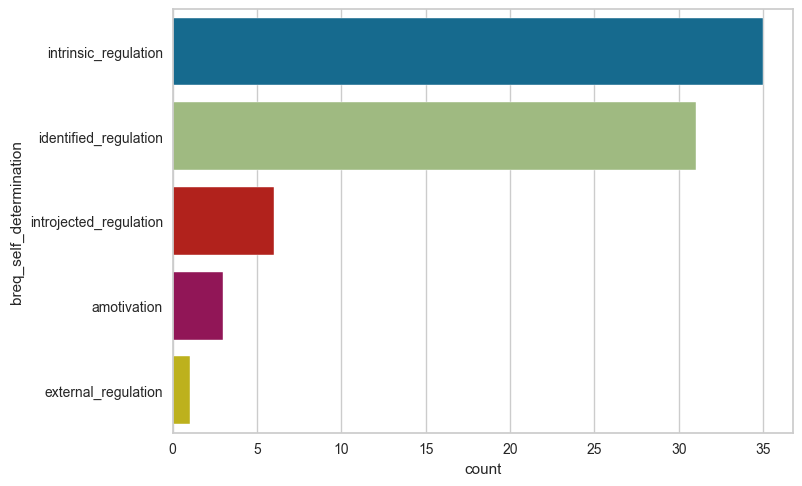

In [15]:
sns.countplot(y="breq_self_determination", data=data)

In [16]:
s = setup(data=data, target='breq_self_determination', silent=True, fix_imbalance=True, session_id=123)

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:15:16
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies


ValueError: y contains previously unseen labels: 'external_regulation'

In [ ]:
best = compare_models()

In [ ]:
plot_model(best, plot='feature')

Big-5 personality prediction

In [ ]:
data = pd.read_pickle('data/fitbit_personality_to_model.pkl')
data

predict extraversion

In [ ]:
data = data.drop(columns=['ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_stability_category', 'ipip_intellect_category', 'filteredDemographicVO2Max', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE'])
data

In [ ]:
sns.countplot(y="ipip_extraversion_category", data=data)

In [ ]:
s = setup(data=data, target='ipip_extraversion_category', silent=True, fix_imbalance=True)

In [ ]:
best = compare_models()

In [ ]:
plot_model(best, plot='feature')

predict agreeableness

In [ ]:
data = data.drop(columns=['filteredDemographicVO2Max', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE', 'ipip_extraversion_category', 'ipip_conscientiousness_category', 'ipip_stability_category', 'ipip_intellect_category'])
data

In [ ]:
sns.countplot(y="ipip_agreeableness_category", data=data)

In [ ]:
s = setup(data=data, target='ipip_agreeableness_category', silent=True, fix_imbalance=True)

In [ ]:
best = compare_models()

In [ ]:
plot_model(best, plot='feature')

predict conscientiousness

In [ ]:
data = fitbit_big5.drop(columns=['id', 'date', 'age', 'gender', 'bmi', 'ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_stability_category', 'ipip_intellect_category'])
data

In [ ]:
sns.countplot(y="ipip_conscientiousness_category", data=data)

In [ ]:
s = setup(data=data, target='ipip_conscientiousness_category', silent=True, fix_imbalance=True)

In [ ]:
best = compare_models()

In [ ]:
plot_model(best, plot='feature')

predict stability

In [ ]:
data = fitbit_big5.drop(columns=['id', 'date', 'age', 'gender', 'bmi', 'ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_intellect_category'])
data

In [ ]:
sns.countplot(y="ipip_stability_category", data=data)

In [ ]:
s = setup(data=data, target='ipip_stability_category', silent=True, fix_imbalance=True)

In [ ]:
best = compare_models()

In [ ]:
plot_model(best, plot='feature')

predict intellect

In [ ]:
data = fitbit_big5.drop(columns=['id', 'date', 'age', 'gender', 'bmi', 'ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_stability_category'])
data

In [ ]:
sns.countplot(y="ipip_intellect_category", data=data)

In [ ]:
s = setup(data=data, target='ipip_intellect_category', silent=True, fix_imbalance=True)

In [ ]:
best = compare_models()

In [ ]:
plot_model(best, plot='feature')